# Live Session 14 (10/10/2022) - Unsupervised Learning
#### By Ika Nurfitriani (PYTN-KS10-008)

Di pertemuan ini akan membahas Unsupervised Learning. Terdapat beberapa hal yang akan dipelajari yaitu unsupervised learning, principal component, PCA & implementasinya, clustering, serta K-means clustering & implementasinya.

# UNSUPERVISED LEARNING
***
Unsupervised machine learning algorithm digunakan untuk mengelompokkan data tidak terstruktur menurut kesamaan dan pola yg berbeda dalam kumpulan data. Unsupervised algorithm menangani data tanpa pelatihan sebelumnya. Di satu sisi, Unsupervised dibiarkan di perangkatnya sendiri untuk menyelesaikan masalah sesuai keinginannya. Unsupervised algorithm berfungsi dengan data tak berlabel dengan tujuan eksplorasi. Jika supervised machine learning berfungsi di bawah aturan yang ditetapkan dengan jelas, unsupervised learning berfungsi dalam kondisi hasil yang tidak diketahui dan karenanya perlu didefinisikan dalam proses. 

Unsupervised machine learning algorithm digunakan untuk:
1. **Explore** the structure of the information
2. **Extract** valuable insights
3. **Detect** patterns
4. **Implement** this into its operation in order to increase efficiency.

Unsupervised learning mendeskripsikan informasi yang ada - menelusuri seluk-beluknya dan mengidentifikasi data apa itu sebenarnya. Dua kasus penggunaan umum untuk unsupervised learning adalah exploratory analysis dan dimensionality reduction. Unsupervised learning sangat berguna dalam analisis eksplorasi karena dapat secara otomatis mengidentifikasi struktur dalam data. 

"Clustering" adalah istilah yang digunakan untuk menggambarkan eksplorasi data. Operasi clustering ada dua, hasil tangkapannya adalah bahwa kedua bagian dari proses tersebut dilakukan pada waktu yang bersamaan. 
Pengelompokan meliputi:
- **Defining the credentials** that form the requirement for each cluster. The credentials are then matched with the processed data and thus the clusters are formed.
- **Breaking down** the dataset into the spesific groups (known as clusters) based on their common features.

Clustering telah digunakan di banyak aplikasi selama beberapa dekade termasuk:
- Biology — for genetic and species grouping
- Medical imaging — for distinguishing between different kinds of tissues
- Market research — for understanding the different groups of customers based on some attributes
- Recommender systems — such as giving you better Amazon suggestions or Netflix movie matches.

Dimensionality reduction, yang mengacu pada metode yang digunakan untuk merepresentasikan data menggunakan lebih sedikit kolom atau fitur, dapat dilakukan melalui unsupervised methods. Singkatnya, Dimensionality reduction adalah proses penyaringan informasi yang relevan. Dimensionality reduction juga dapat diulangi untuk menyingkirkan hal-hal yang tidak perlu.

Data mentah biasanya dilapisi dengan lapisan noise data yang tebal. Bisa apa saja - nilai yang hilang, data yang salah, bit yang kacau, sesuatu yang sederhana yang tidak relevan dengan penyebabnya. Karena itu, sebelum kita mulai menggali insight, kita perlu membersihkannya terlebih dahulu. Dari sudut pandang teknis, Dimensionality reduction adalah proses mengurangi kompleksitas data sambil mempertahankan bagian yang relevan dari strukturnya hingga tingkat tertentu.

## Principal Component Analysis
Principal Component Analysis atau PCA adalah teknik linear dimensionality reduction yang dapat digunakan untuk mengekstraksi informasi dari ruang dimensi tinggi dengan memproyeksikannya ke dalam sub-ruang berdimensi lebih rendah. PCA mencoba untuk mempertahankan bagian penting yang memiliki lebih banyak variasi data dan menghapus bagian yang tidak penting dengan variasi yang lebih sedikit.

## K-Means
K-Means adalah centroid-based algorithm, atau distance-based algorithm, dimana kita menghitung jarak untuk menetapkan titik ke sebuah cluster. Di K-Means, setiap cluster dikaitkan dengan centroid.

## Reduksi Dimensi : PCA

**Import library yang dibutuhkan**

In [14]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

import pylab as plt

from sklearn.cluster import KMeans

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [15]:
iris = load_iris()
X, y = iris.data, iris.target
pca = PCA(n_components=2)

pca.fit(X)
X_reduced = pca.transform(X)
print("Reduced dataset shape:", X_reduced.shape)

Reduced dataset shape: (150, 2)


Arti dari 2 componen:
0.361 x sepal length (cm) + -0.085 x sepal width (cm) + 0.857 x petal length (cm) + 0.358 x petal width (cm)
0.657 x sepal length (cm) + 0.730 x sepal width (cm) + -0.173 x petal length (cm) + -0.075 x petal width (cm)


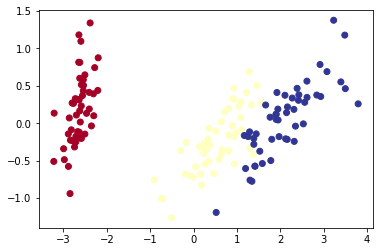

In [16]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='RdYlBu')

print("Arti dari 2 componen:")
for component in pca.components_:
    print(" + ".join("%.3f x %s" % (value, name)
        for value, name in zip(component, iris.feature_names)))

## Klaster : K-Means
K-Means merupakan teknik klaster paling sederhana (berdasarkan jarak)

Akan diaplikasikan pada iris dataset

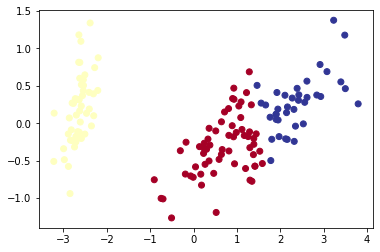

In [17]:
k_means = KMeans(n_clusters=3, random_state=0) # Fixing the RNG in kmeans
k_means.fit(X)
y_pred = k_means.predict(X)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred, cmap='RdYlBu');

**Open data**

In [18]:
df = pd.read_csv("Wholesale customers data.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [19]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


**Scaling data**

In [20]:
scaler = StandardScaler()
scaler.fit(df)

data_scaled = scaler.transform(df)

**Cluster initial**

In [21]:
kmeans = KMeans(n_clusters=4)

kmeans.fit(data_scaled)

KMeans(n_clusters=4)

In [22]:
kmeans.inertia_

1851.7595764506575

In [23]:
inertias = []
for i in range(1,21):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data_scaled)
    
    iner = kmeans.inertia_
    inertias.append(iner)

Text(0.5, 1.0, 'Elbow Method')

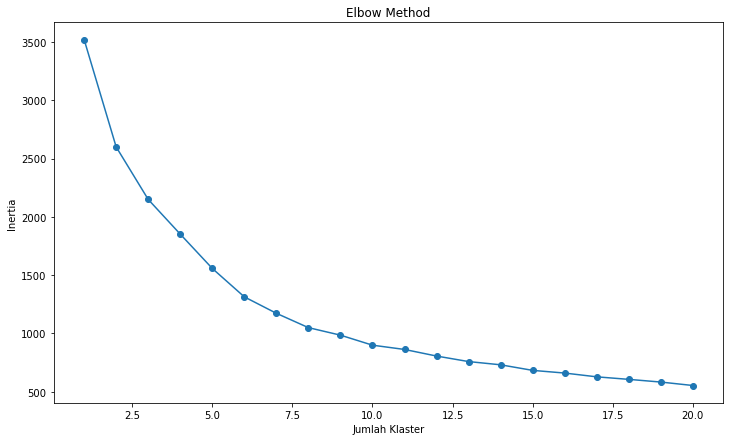

In [24]:
plt.figure(figsize=(12,7))
plt.plot(range(1,21), inertias, marker='o')
plt.xlabel('Jumlah Klaster')
plt.ylabel('Inertia')
plt.title('Elbow Method')

In [25]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(data_scaled)

KMeans()

In [26]:
cluster = kmeans.predict(data_scaled)
df['cluster'] = cluster
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,2,3,12669,9656,7561,214,2674,1338,1
1,2,3,7057,9810,9568,1762,3293,1776,1
2,2,3,6353,8808,7684,2405,3516,7844,1
3,1,3,13265,1196,4221,6404,507,1788,3
4,2,3,22615,5410,7198,3915,1777,5185,1
